# TASK 2


Autoencoder is a very popular deep learning model for unsupervised learning. The most 
amazing fact about Autoencoder is, it has capability of representing data in low dimensional
space and extracting interesting patterns. Use Autoencoder to perform clustering over
‘ElectricDevices’ dataset and the minimum expectation is to bring good results than any
traditional clustering algorithm (preferrably KMeans). Take a look at the paper link below and
you can use the architecture proposed in the paper (You can use other architecture if you are
not convinced by this paper, don’t forget to cite the paper in your document).

http://www.nlpr.ia.ac.cn/english/irds/People/lwang/M-MCG_EN/research/CFS-CIAPR13/paper.pdf 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder

In [2]:
import keras
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K

Using TensorFlow backend.


In [3]:
# Retrieving the Dataset onto a pandas dataframe
filename = 'ElectricDevices' 
data = pd.read_csv(filename, header = None, delimiter = ",", index_col = False)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,6,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,...,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621,-0.19621
1,6,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,...,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118,-0.24118
2,6,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,...,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606,-0.23606
3,6,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,...,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032,-0.21032
4,6,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,...,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117,-0.17117


In [5]:
scalar = MinMaxScaler()
features = scalar.fit_transform(data.iloc[:,1:97].values)

In [6]:
feature_Df = pd.DataFrame(features)
feature_Df.describe()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
count,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,...,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000
mean,0.286413,0.214432,0.286719,0.322403,0.287121,0.304321,0.282954,0.264695,0.264055,0.273241,...,0.380885,0.373269,0.298655,0.277867,0.367909,0.362734,0.283464,0.300127,0.358310,0.406998
std,0.075440,0.067404,0.058508,0.059100,0.053129,0.055881,0.050141,0.056110,0.051515,0.051129,...,0.075793,0.077572,0.081062,0.086120,0.071198,0.065827,0.073937,0.076472,0.062542,0.059288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251550,0.179326,0.256148,0.290485,0.258173,0.273747,0.255553,0.233926,0.235265,0.244916,...,0.339682,0.331679,0.254436,0.231793,0.329443,0.328301,0.245089,0.260627,0.326686,0.378164
50%,0.275220,0.205455,0.279529,0.316223,0.281896,0.298910,0.278939,0.259251,0.259413,0.269741,...,0.358367,0.350845,0.275838,0.255246,0.350131,0.349243,0.268343,0.286535,0.348401,0.398338
75%,0.282841,0.213809,0.286946,0.324492,0.289545,0.307160,0.286674,0.267438,0.267265,0.278161,...,0.399413,0.390704,0.316200,0.289704,0.375841,0.356861,0.277042,0.295810,0.355583,0.404769
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Principal Component Analysis

In [7]:
pca = PCA(n_components=3)
PCs= pca.fit_transform(features)
d = {'PC1': PCs[:,0], 'PC2': PCs[:,1], 'PC3': PCs[:,2], 'Label': data[0]}
PC_Df = pd.DataFrame(data = d)

In [8]:
PC_Df.head()

,PC1,PC2,PC3,Label
0,0.155380,-0.082720,0.216001,6
1,0.198277,-0.085377,0.252369,6
2,0.282349,-0.069895,0.019966,6
3,0.156158,-0.095161,0.198845,6
4,0.106072,0.057254,-0.134196,6


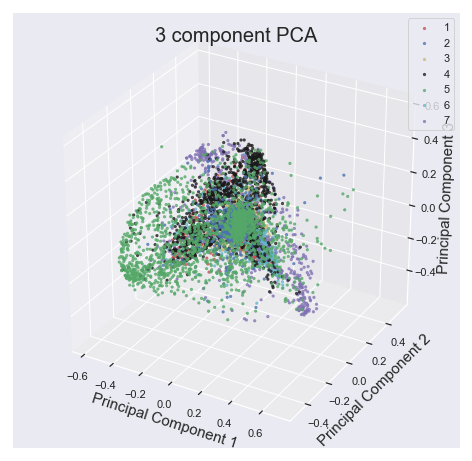

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r', 'b', 'y', 'k', 'g', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = PC_Df['Label'] == target
    ax.scatter(PC_Df.loc[indicesToKeep, 'PC1']
               , PC_Df.loc[indicesToKeep, 'PC2']
               , PC_Df.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 5
              , alpha = 0.7)
ax.legend(targets)
ax.grid()

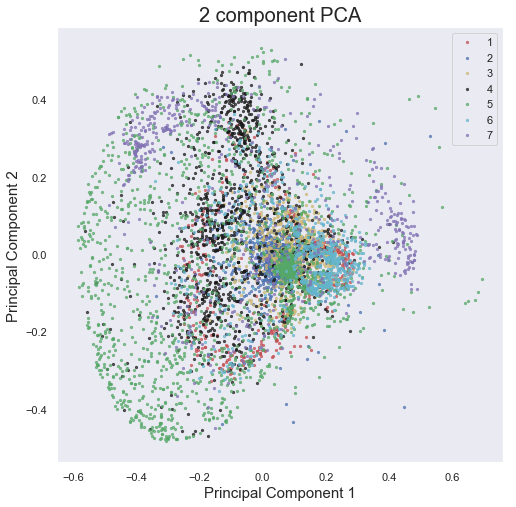

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r', 'b', 'y', 'k', 'g', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = PC_Df['Label'] == target
    ax.scatter(PC_Df.loc[indicesToKeep, 'PC1']
               , PC_Df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 5
              , alpha = 0.7)
ax.legend(targets)
ax.grid()

## K-means Clustering

In [11]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(PC_Df.loc[:,:'PC3'])
labels = kmeans.predict(PC_Df.loc[:,:'PC3'])
centroids = kmeans.cluster_centers_
kmeans.inertia_

166.76351342133688

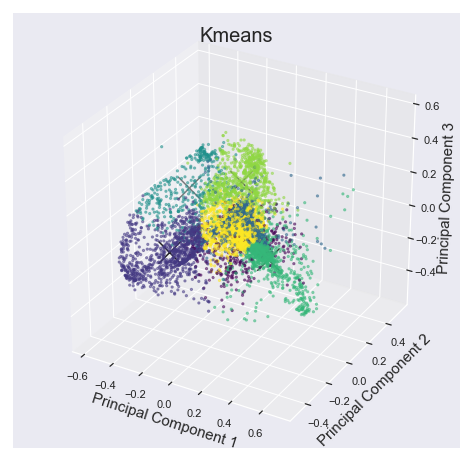

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Kmeans', fontsize = 20)

ax.scatter(PC_Df.loc[:,'PC1'], PC_Df.loc[:,'PC2'], PC_Df.loc[:,'PC3'], c=labels, s=5, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=500,color='black')


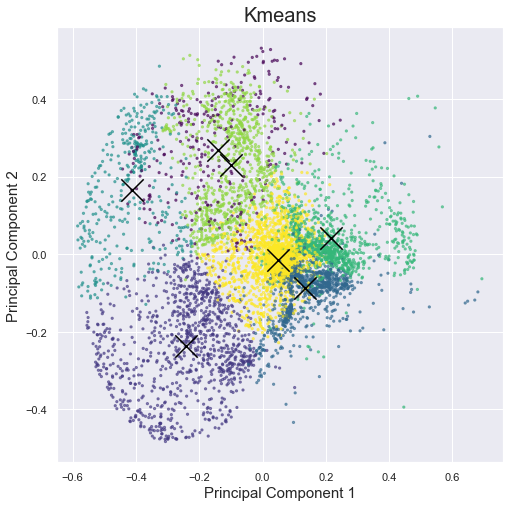

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kmeans', fontsize = 20)
ax.scatter(PC_Df.loc[:,'PC1'], PC_Df.loc[:,'PC2'], c=labels, s=5, cmap='viridis', alpha=0.6)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=500,color='black')

In [14]:
# read the data
X_train, X_test, y_train, y_test = train_test_split(features, data[0], test_size=0.1, random_state=42)

In [15]:
X_train.shape

(6939, 96)

## Autoencoder


In [16]:
# this is the size of our encoded representations
encoding_dim = 3  # 3 floats -> compression of factor 32, assuming the input is 96 floats

# this is our input placeholder
input_features = Input(shape=(96,)) # 96 input features

# "encoded" is the encoded representation of the input
encoded = Dense(100)(input_features)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dense(50)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dense(encoding_dim)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)



# "decoded" is the lossy reconstruction of the input
decoded = Dense(50)(encoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dense(100)(decoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dense(96, activation='sigmoid')(decoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_features, decoded)

In [17]:
# this model maps an input to its encoded representation
encoder = Model(input_features, encoded)

In [18]:
# # create a placeholder for an encoded (3-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# # retrieve the decoder layers of the autoencoder model
decoder_layer_1 = autoencoder.layers[7]
decoder_1 = decoder_layer_1(encoded_input)

decoder_layer_2 = autoencoder.layers[8]
decoder_2 = decoder_layer_2(decoder_1)

decoder_layer_3 = autoencoder.layers[9]
decoder_3 = decoder_layer_3(decoder_2)

decoder_layer_4 = autoencoder.layers[10]
decoder_4 = decoder_layer_4(decoder_3)

decoder_layer_5 = autoencoder.layers[11]

# # create the decoder model
decoder = Model(inputs = encoded_input, outputs = decoder_layer_5(decoder_4))

## Custom Loss Function

Based on http://www.nlpr.ia.ac.cn/english/irds/People/lwang/M-MCG_EN/research/CFS-CIAPR13/paper.pdf

In [19]:
def k_mean_distance(encoded_data, cx, cy, cz, i_centroid, cluster_labels):
    
        # Euclidean distance from centroid - which act as the clustering error
        distances = [(np.sqrt((x-cx)**2+(y-cy)**2+(z-cz)**2)) for (x, y, z) in encoded_data[cluster_labels == i_centroid]]
        # Euclidean distances of individual dimensions
        err_x = [np.sqrt((x-cx)**2) for (x, y, z) in encoded_data[cluster_labels == i_centroid]]
        err_y = [np.sqrt((y-cy)**2) for (x, y, z) in encoded_data[cluster_labels == i_centroid]]
        err_z = [np.sqrt((z-cz)**2) for (x, y, z) in encoded_data[cluster_labels == i_centroid]]
        return distances, err_x, err_y, err_z

# Custom Loss Function
def aen_loss(x,x_predicted):
    # Initializing array to store sample wise euclidean distance
    Centroid_dist = np.zeros((6939,), dtype=float)
    # Initializing array to store sample wise euclidean distance of individual dimension
    dec_inp = np.zeros((6939,3), dtype=float)
    
    # Encoder output update for the training data
    encoded_data = encoder.predict(X_train)
    
    # Determination of Centroids and corresponding clusters
    km = KMeans(n_clusters=7, random_state=0)
    clusters=km.fit_predict(encoded_data)
    centroids = km.cluster_centers_
    labels = km.predict(encoded_data)

    for i, (cx, cy, cz) in enumerate(centroids):
        # Calculating the euclidean distances of the present iteration
        distance_errs = k_mean_distance(encoded_data, cx, cy, cz, i, clusters)
        # distance_errs contains 4 columns --- (1) Total Euclidean-distance (2-3) x,y,z distance from centroid
        distance_errs = np.transpose(np.array(distance_errs))
        
        mean_distance = distance_errs[:,0]
        xyz_error = distance_errs[:,1:4]
        
        # Rearranging the distances sample wise, according to the corresponding cluster centers
        for j in range(0,mean_distance.size):
            pos = clusters == i 
            posdef = np.where(pos== 1)[0]
            # Total euclidean distance 
            Centroid_dist[posdef[j]] = mean_distance[j]
            # The individual dimension distances can be used as the input to the decoder model
            dec_inp[posdef[j],:] = xyz_error[j,:]
    
    # Tunable Hyperparameter weight
    lambda1 = 0.1 
    lambda2 = 1.0
    
    # This component can be added to the means square error loss as a clustering component
    Centroid_dist = lambda1*Centroid_dist
    
    # The xyz - clustering error at the encoder end is propogated through the decoder for realstic error definition
    decoded_error = decoder.predict(dec_inp)
    decoded_clustering_error = np.sum(decoded_error, axis=1)/96.0

    # This component can also be added to the means square error loss as another clustering component
    decoded_clustering_error = lambda2*decoded_clustering_error

    
    #Variants of loss function
    #loss = keras.losses.mean_squared_error(x, x_predicted) # No clustering error component
    
    # use lambda1 to tweak the clustering error contribution
    #loss = keras.losses.mean_squared_error(x, x_predicted) + tf.convert_to_tensor(Centroid_dist, np.float32)
    
    # use lambda2 to tweak the clustering error contribution
    loss = keras.losses.mean_squared_error(x, x_predicted) + tf.convert_to_tensor(decoded_clustering_error, np.float32)

    return loss

In [20]:
# Stochastic grdient descent optimizer customised
sgd = optimizers.SGD(lr=0.4, decay=1e-6, momentum=0.4, nesterov=True)

autoencoder.compile(optimizer=sgd, loss=aen_loss)

cp = ModelCheckpoint(filepath="autoencoder.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

In [21]:
history = autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=False,
                batch_size=1,
                validation_data=(X_test, X_test),
                verbose=1,
                callbacks=[cp, tb]).history

#autoencoder.save_weights('./results/ae_weights.h5')

Train on 6939 samples, validate on 772 samples
Epoch 1/10
6939/6939 [==============================] - 13s 2ms/step - loss: 0.5062 - val_loss: 0.5056
Epoch 2/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5055 - val_loss: 0.5055
Epoch 3/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5055 - val_loss: 0.5055
Epoch 4/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5055 - val_loss: 0.5054
Epoch 5/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5053 - val_loss: 0.5052
Epoch 6/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5052 - val_loss: 0.5052
Epoch 7/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5051 - val_loss: 0.5051
Epoch 8/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5051 - val_loss: 0.5051
Epoch 9/10
6939/6939 [==============================] - 11s 2ms/step - loss: 0.5050 - val_loss: 0.5050
Epoch 10/10
6939/6939 [===

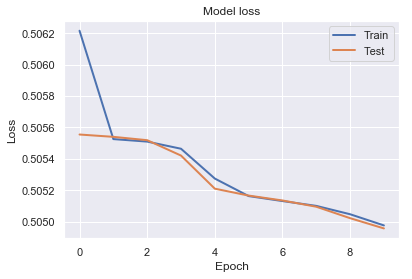

In [22]:
#Plotting Train and Test Loss
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [23]:
# encode and decode some the input features
encoded_features = encoder.predict(X_train)
decoded_features = decoder.predict(encoded_features)

In [24]:
# The encoded information 
encoded_df = pd.DataFrame(encoded_features)
encoded_df.head()

,0,1,2
0,0.599308,1.539710,0.956112
1,0.287331,1.672361,0.394801
2,0.005689,1.518304,1.277662
3,0.305952,1.531195,1.096922
4,0.587942,1.665673,0.422962


In [25]:
decoded_df = pd.DataFrame(decoded_features)
decoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.301148,0.221704,0.291152,0.329937,0.287755,0.297979,0.286225,0.267099,0.268759,0.272282,...,0.360209,0.361193,0.291456,0.258618,0.348010,0.361044,0.293171,0.300983,0.370320,0.427400
1,0.250959,0.202362,0.264332,0.302146,0.270967,0.293932,0.273169,0.246712,0.250976,0.261598,...,0.427745,0.421445,0.356691,0.310773,0.400440,0.376639,0.284158,0.295190,0.357692,0.396746
2,0.256727,0.222217,0.275274,0.311604,0.281450,0.311614,0.277079,0.255099,0.258196,0.282919,...,0.367593,0.373320,0.308533,0.266063,0.375523,0.367363,0.276038,0.293100,0.355560,0.395206
3,0.279010,0.220855,0.285825,0.322606,0.287425,0.304773,0.285578,0.264294,0.264053,0.274851,...,0.367291,0.365460,0.301742,0.267349,0.363825,0.368109,0.284363,0.298462,0.367504,0.414511
4,0.267616,0.202141,0.271886,0.306807,0.273818,0.286395,0.272389,0.250398,0.253763,0.260766,...,0.407231,0.406249,0.333466,0.286352,0.374610,0.362831,0.289567,0.297550,0.358669,0.408866


In [26]:
xtrain = pd.DataFrame(X_train)
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.369864,0.150491,0.373947,0.262140,0.377571,0.245787,0.373947,0.205872,0.356885,0.217003,...,0.442178,0.302225,0.367709,0.200059,0.433073,0.302225,0.362713,0.230699,0.433073,0.355999
1,0.350017,0.182451,0.258441,0.293621,0.260945,0.319148,0.317003,0.237030,0.238231,0.248004,...,0.335382,0.328476,0.251052,0.294250,0.328476,0.328476,0.245134,0.350280,0.328476,0.380227
2,0.277448,0.208568,0.282131,0.319347,0.284865,0.302217,0.282131,0.262492,0.262567,0.273338,...,0.357285,0.349928,0.274978,0.254748,0.570366,0.349928,0.269249,0.288073,0.349928,0.400027
3,0.255389,0.184406,0.333710,0.295546,0.262735,0.278740,0.335274,0.238936,0.240053,0.249900,...,0.337021,0.378228,0.282850,0.231995,0.330082,0.397109,0.246939,0.264203,0.330082,0.451412
4,0.269445,0.199802,0.274179,0.310712,0.276836,0.293699,0.274179,0.253946,0.254398,0.264834,...,0.349933,0.342728,0.266947,0.469362,0.342728,0.579063,0.261154,0.279413,0.342728,0.421526


## Clustering of Encoded Data

In [27]:
#encoded_features = encoder.predict(X_train)
km2 = KMeans(n_clusters=7, random_state=0)
km2.fit(encoded_df)
labels = km2.predict(encoded_df)
#clusters=km2.fit_predict(encoded_df)
centroids = km2.cluster_centers_
# Sum of distances of samples to their closest cluster center
km2.inertia_

245.77718549164354

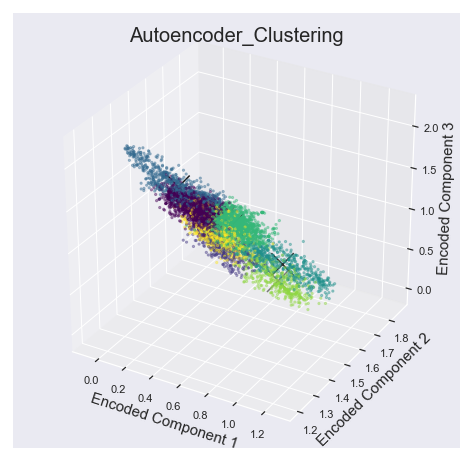

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Encoded Component 1', fontsize = 15)
ax.set_ylabel('Encoded Component 2', fontsize = 15)
ax.set_zlabel('Encoded Component 3', fontsize = 15)
ax.set_title('Autoencoder_Clustering', fontsize = 20)

ax.scatter(encoded_features[:,0], encoded_features[:,1], encoded_features[:,2], c=labels, s=5, cmap='viridis', alpha=0.4)
#ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', s=50, alpha=1)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=500,color='k')



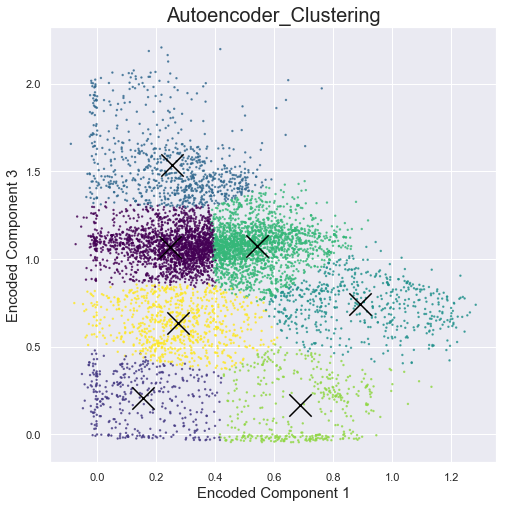

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Encoded Component 1', fontsize = 15)
ax.set_ylabel('Encoded Component 3', fontsize = 15)
ax.set_title('Autoencoder_Clustering', fontsize = 20)

ax.scatter(encoded_features[:,0], encoded_features[:,2], c=labels, s=2, cmap='viridis', alpha=0.7)
ax.scatter(centroids[:, 0], centroids[:, 2], marker='x', s=500,color='black')